In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [2]:
# 解决中文显示问题
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 创建模拟数据（3维数据）
N = 500
M = 250

## 根据给定的均值和协方差矩阵构建数据,400条
mean1 = (0, 0, 0)
cov1 = np.diag((1, 2, 3))
data1 = np.random.multivariate_normal(mean1, cov1, N)

## 产生一个数据分布不均衡的数据集， 100条
mean2 = (2, 2, 1)
cov2 = np.array(((3, 1, 0), (1, 3, 0), (0, 0, 3)))
data2 = np.random.multivariate_normal(mean2, cov2, M)

## 合并data1和data2这两个数据集
data = np.vstack((data1, data2))

## 产生数据对应的y值
y1 = np.array([True] * N + [False] * M)
y2 = ~y1

类别概率:	 [0.32453686 0.67546314]
均值:
 [[ 2.06089738  2.08681386  0.67935499]
 [ 0.05576672 -0.00984675  0.10274979]] 

方差:
 [[[ 2.97175726  1.45696244  0.21580787]
  [ 1.45696244  3.59829314 -0.20577771]
  [ 0.21580787 -0.20577771  2.98394025]]

 [[ 1.07125503  0.0147241   0.15636479]
  [ 0.0147241   2.05584494  0.13731191]
  [ 0.15636479  0.13731191  2.99511587]]] 

似然函数的值:
 -5.693267706335569
距离: [1 0]
准确率：85.47%


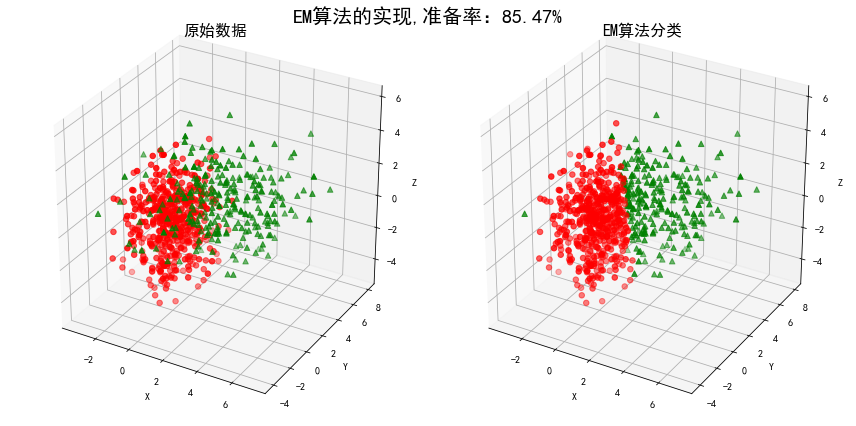

In [4]:
## 预测结果(得到概率密度值)
g = GaussianMixture(n_components=2, covariance_type='full', tol=1e-6, max_iter=1000, init_params='kmeans')
# 模型训练
g.fit(data)
# 效果输出
print('类别概率:\t', g.weights_)
print('均值:\n', g.means_, '\n')
print('方差:\n', g.covariances_, '\n')
print('似然函数的值:\n', g.lower_bound_)
mu1, mu2 = g.means_
sigma1, sigma2 = g.covariances_

# 预测分类（根据均值和方差对原始数据进行概率密度的推测）
norm1 = multivariate_normal(mu1, sigma1)
norm2 = multivariate_normal(mu2, sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

##计算均值的距离，然后根据距离得到分类情况
dist = pairwise_distances_argmin([mean1, mean2], [mu1, mu2], metric='euclidean')
print ("距离:", dist)
if dist[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1

##计算准确率
acc = np.mean(y1 == c1)
print (u'准确率：%.2f%%' % (100*acc))

## 画图
fig = plt.figure(figsize=(12, 6), facecolor='w')

## 添加一个子图，设置为3d的
ax = fig.add_subplot(121, projection='3d')
## 点图
ax.scatter(data[y1, 0], data[y1, 1], data[y1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[y2, 0], data[y2, 1], data[y2, 2], c='g', s=30, marker='^', depthshade=True)
## 标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
## 标题
ax.set_title(u'原始数据', fontsize=16)

## 添加一个子图，设置为3d
ax = fig.add_subplot(122, projection='3d')
# 画点
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
# 设置标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# 设置标题
ax.set_title(u'EM算法分类', fontsize=16)

# 设置总标题
plt.suptitle(u'EM算法的实现,准备率：%.2f%%' % (acc * 100), fontsize=20)
plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()